# Forelesning 1: Programmering i kjemi

I denne forelesningen skal vi se på noen enkle anvendelser av programmering i kjemi:
- Utforske periodiske egenskaper ved grunnstoffer.
- Balansere reaksjonslikninger.
- Utforske elektrokjemiske celler.
- Regne på pH i ulike syre-base-systemer.
- Visualisere molekyler.

Det er ikke pensum til eksamen å kunne bruke disse bibliotekene. Dette er ment for å vise noen nyttige muligheter, og for å vise generell problemløsning og programmering (som er pensum til eksamen!).

Menti: https://www.menti.com/jp7xwuafgb

## Jupyter Notebooks til rapportskriving

$\int_0^\pi x^2 dx$

$2H_2 + O_2 \rightarrow 2H_2O$

## Chemlib-bibliotket
Chemlib-biblioteket inneholder mye nyttig informasjon om grunnstoffene våre, og du kan balansere blant annet utføre fortynninger, balansere reaksjoner og tegne og regne på elektrokjemiske celler.

### Atomegenskaper
Her er noen eksempler på hvilke egenskaper vi kan hente opp med chemlib:

|     Kommando             |     Forklaring                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------|
|     AtomicMass           |     Atommasse i g/mol                                                                                              |
|     AtomicNumber         |     Atomnummer                                                                                                     |
|     AtomicRadius         |     Atomradius i pm                                                                                                |
|     BolingPoint          |     Kokepunkt i K                                                                                                  |
|     Density              |     Tetthet i g/cm3                                                                                                |
|     Discoverer           |     Oppdager av grunnstoffet                                                                                       |
|     Electronegativity    |     Pauling-elektronegativitet                                                                                     |
|     Electrons            |     Antallet elektroner                                                                                            |
|     FirstIonization      |     Første ioniseringsenergi i eV                                                                                  |
|     Group                |     Gruppen                                                                                                        |
|     Isotopes             |     Antallet isotoper                                                                                              |
|     MeltingPoint         |     Smeltepunkt i K                                                                                                |
|     Metal                |     Returnerer True hvis stoffet er et   metall.                                                                   |
|     Natural              |     True hvis naturlig forekommende isotoper og False hvis ikke    |
|     Neutrons             |     Antallet nøytroner                                                                                             |
|     Period               |     Perioden                                                                                                       |
|     Phase                |     Fase ved romtemperatur                                                                                         |
|     Protons              |     Antallet protoner                                                                                              |
|     Shells               |     Antallet hovedskall (n)                                                                                        |
|     Type                 |     Kategori i periodesystemet (f.eks.   alkalimetall, halogen)                                                    |

In [15]:
from chemlib import Element

vanadium = Element("V")
print(vanadium.BoilingPoint)

3680


## Støkiometriske beregninger

In [19]:
from chemlib import Compound, Reaction

In [20]:
etanol = Compound("C2H6O")
print(etanol.get_amounts(grams=3))

{'grams': 3, 'molecules': 3.921e+22, 'moles': 0.065}


In [21]:
SO2 = Compound("SO2")
O2 = Compound("O2")
SO3 = Compound("SO3")

reaksjon = Reaction([SO2, O2], [SO3])
reaksjon.balance()
print(reaksjon.formula)
print(reaksjon.is_balanced)

2S₁O₂ + 1O₂ --> 2S₁O₃
True


## Elektrokjemi

{'Cell': 'Zn | Zn2+ || Cu2+ | Cu', 'Anode': 'Zn', 'Cathode': 'Cu', 'Cell Potential': 1.1}


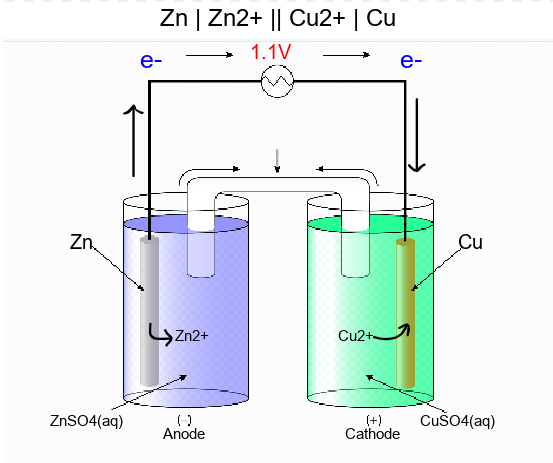

In [22]:
from chemlib import Galvanic_Cell

celle = Galvanic_Cell("Cu", "Zn")
print(celle.properties)
celle.diagram

## Mendeleev-biblioteket
Dette biblioteket inneholder kun muligheter til å hente grunnstoffegenskaper, men har noen ekstra nyttige funksjoner som chemlib ikke har.

In [14]:
from mendeleev import element

krom = element(24)

print(krom.electronegativity())

1.66


En ting som er svært praktisk med mendeleev-biblioteket, er at vi kan hente grunnstoffer ved hjelp av atomnummer istedenfor symbol. Det gjør at vi lettere kan iterere over grunnstoffer i en løkke, f.eks. slik:

In [ ]:
for i in range(1,119):
    grunnstoff = element(i)
    print(grunnstoff.name,": ", grunnstoff.electronegativity())

- Hva gjør programmet ovenfor?
- Programmet nedenfor skal plotte trendene i elektronegativitet for alle grunnstoffer. Fyll inn det som mangler.

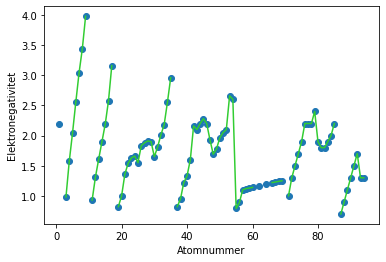

In [13]:
import matplotlib.pyplot as plt
from mendeleev import element

atomnummer = []
elektronegativitet = []

for i in range(1,119):
    grunnstoff = element(i)
    atomnummer.append(grunnstoff.atomic_number)
    elektronegativitet.append(grunnstoff.electronegativity())
    
plt.plot(atomnummer, elektronegativitet, linestyle=" ", marker="o")
plt.plot(atomnummer, elektronegativitet, color = "limegreen")
plt.xlabel("Atomnummer")
plt.ylabel("Elektronegativitet")
plt.show()

## Syrer og baser

Vi bruker et nyttig bibliotek som heter pHcalc til å regne på pH i syrer og baser.

In [ ]:
from pHcalc.pHcalc import Acid

In [12]:
from pHcalc.pHcalc import Acid, Neutral, System

# 1 M NaOH. Definerer det pH-nøytrale systemet, OH- legges på automatisk
Na = Neutral(charge=1, conc=1) 
sol1 = System(Na)
sol1.pHsolve()
print(sol.pH) # Gir pH ca. lik 14

# 1 M HCl. Definerer det pH-nøytrale systemet, H+ legges på automatisk
Cl = Neutral(charge=-1, conc=1) 
sol2 = System(Cl)
sol2.pHsolve()
print(sol2.pH) # Gir pH ca. lik 0

# 1 M HF (svak syre)
hf = Acid(Ka=6.76E-4, charge=0, conc=1) # eventuelt pKa=3.17
sol3 = System(hf)
sol3.pHsolve()
print(sol3.pH) # Gir pH ca. lik 1.59

13.999999999999998
-2.6645352591003757e-15
1.5906745910644506


## Visualisering av molekyler

In [23]:
import py3Dmol

testosteron = py3Dmol.view(query='cid:6013')
testosteron.setStyle({'stick':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
spike_prot = py3Dmol.view(query='pdb:6B7N')
spike_prot.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

__Oppgaver__:
1.	Lag et program som skriver ut eller plotter kokepunktet til alle halogenene. Beskriv og forklar trenden i kokepunkt.
2.	Plott atomradius som funksjon av atomnummer for alle grunnstoffer i periodesystemet og forklar det du ser. Plott deretter kun for grunnstoff 19–36 og forklar hva du ser.
3. Lag en 3D-modell av benzosyre og proteinet keratin (6EC0 i PDB). 